## Extract the cells from a Microscopic Image and find the Region Properties of each Cell

Text(0.5, 1.0, 'detected')

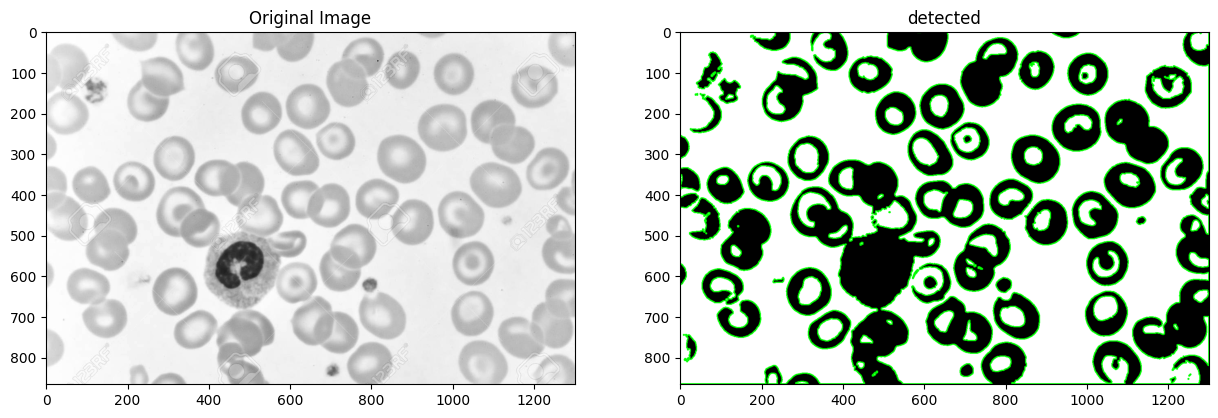

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

fig=plt.figure(figsize=(15,10))

#input the microscopic image
image1=cv2.imread('/content/drive/MyDrive/Colab Notebooks/Standard Images/rbc2.jpg')
image1=cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
#(threshold, image1)=cv2.threshold(image1,150,255,cv2.THRESH_BINARY)

#apply gaussian blur
image2=cv2.GaussianBlur(image1,(5,5),0)

#applying otsu's thersholding
#INV is used for better dilation results
(_,image3)=cv2.threshold(image2,100,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

#performing dilation followed by closing to highlight the cells
kernel=np.array([
    [1,1,1],
    [1,1,1],
    [1,1,1]
    ],dtype=np.uint8)
image4=cv2.dilate(image3,kernel,iterations=1)
#image4=cv2.morphologyEx(image4,cv2.MORPH_CLOSE,kernel)
#image4=cv2.GaussianBlur(image4,(5,5),0)
#(_,image4)=cv2.threshold(image4,100,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

#detecting the number of cells or contours in this
image5=cv2.cvtColor(image4,cv2.COLOR_GRAY2BGR)
#finding the contours using the function findContours
#RETR_LIST returns all the contours in the exterior and interior of the image
contours,_=cv2.findContours(image4,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
#drawing the contours
image_contours=cv2.drawContours(image5.copy(),contours,-1,(0,255,0),2)
#finding the number of cells:
#cells=len(contours)
#print("The number of cells:",cells)

#using Hough Transform
#1.2 for faster circle detection
#20 is the minimum distance between the centers of the circle
#param1 is the higher threshold of the canny edge detector
#param2 is the threshold considered by the accumulator to be a valid circle
circles=cv2.HoughCircles(image4, cv2.HOUGH_GRADIENT, 2, 20, param1=50, param2=28, minRadius=1,maxRadius=20)

cells ,x_count,y_count=[],[],[]#x,y coordinate circles
#labeling
if circles is not None:
  #converting the coordinates and radius of the circle to integers
  circles=np.round(circles[0,:]).astype("int")

  for (x,y,r) in circles:
    cv2.circle(image5,(x,y),r,(0,255,0),2)
    cv2.rectangle(image5, (x - 2, y - 2),(x + 2, y + 2), (0, 128, 255), -1)
    cells.append(r)
    x_count.append(x)
    y_count.append(y)

fig.add_subplot(121)
plt.imshow(image1,cmap="gray")
plt.title("Original Image")



fig.add_subplot(122)
plt.imshow(image_contours)
plt.title("detected")

Cell 1: Area = 860.0, Perimeter = 242.373629022557, Centroid = (35.763953488372096, 8.843023255813954)
Cell 2: Area = 4.0, Perimeter = 2.0, Centroid = (0.0, 14.5)
Cell 3: Area = 3.0, Perimeter = 1.0, Centroid = (0.0, 70.0)
Cell 4: Area = 138.0, Perimeter = 77.45584412271572, Centroid = (7.130434782608695, 83.02173913043478)
Cell 5: Area = 503.0, Perimeter = 118.59797974644665, Centroid = (8.544731610337973, 181.59840954274352)
Cell 6: Area = 2209.0, Perimeter = 447.0315292925759, Centroid = (26.46310547759167, 227.37256677229516)
Cell 7: Area = 2683.0, Perimeter = 635.7483040656406, Centroid = (44.9608647036899, 279.54453969437196)
Cell 8: Area = 204.0, Perimeter = 87.42640687119285, Centroid = (7.117647058823529, 376.97058823529414)
Cell 9: Area = 1642.0, Perimeter = 220.55129855222071, Centroid = (19.581607795371497, 428.4518879415347)
Cell 10: Area = 1563.0, Perimeter = 415.025432638166, Centroid = (14.075495841330774, 487.61932181701854)
Cell 11: Area = 53.0, Perimeter = 33.6568542

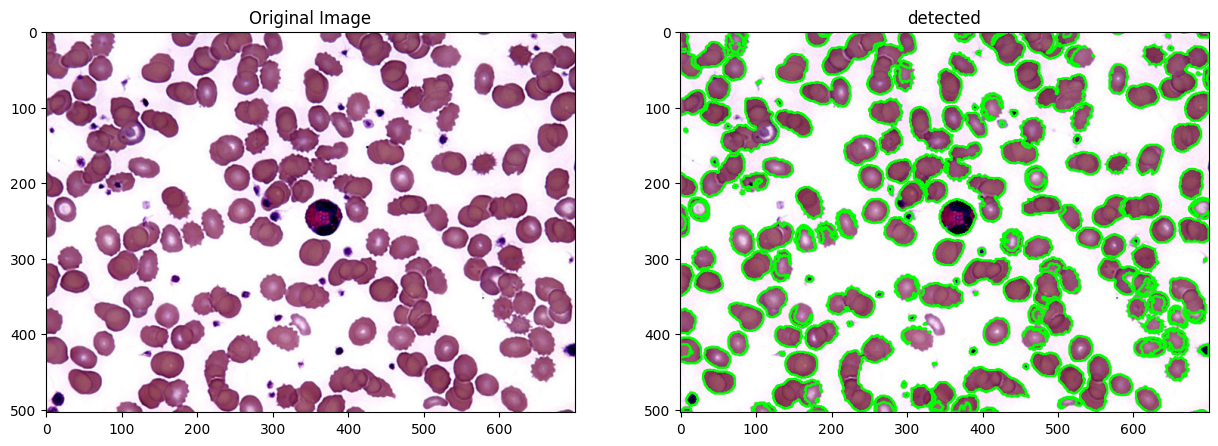

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.measure import regionprops, label

fig=plt.figure(figsize=(15,10))


def count_blood_cells(image_path):
    # Read the image
    image = cv2.imread(image_path)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    if image is None:
        print("Error: Could not read image.")
        return

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    sharpened = cv2.filter2D(gray, -1, kernel)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(sharpened, (5, 5), 0)

    # Apply adaptive thresholding
    _, thresholded = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY_INV)

    # Find contours
    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours based on size (to remove small artifacts)
    min_contour_area = 2
    filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_contour_area]

    # Draw contours on the original image
    output = image.copy()
    cv2.drawContours(output, filtered_contours, -1, (0, 255, 0), 2)

    labeled_image = label(thresholded)
    properties = regionprops(labeled_image)

    for i, prop in enumerate(properties):
        print(f"Cell {i + 1}: Area = {prop.area}, Perimeter = {prop.perimeter}, Centroid = {prop.centroid}")

    # Draw contours on the original image
    output = image.copy()
    cv2.drawContours(output, filtered_contours, -1, (0, 255, 0), 2)


    # Display results
    print(f"Number of blood cells detected: {len(filtered_contours)}")
    fig.add_subplot(121)
    plt.imshow(image)
    plt.title("Original Image")



    fig.add_subplot(122)
    plt.imshow(output)
    plt.title("detected")

# Example usage
image_path = "/content/drive/MyDrive/Colab Notebooks/Standard Images/rbc12.jpg"
count_blood_cells(image_path)
